In [1]:
pip install nashpy


Nash Equilibria:
(array([0., 1.]), array([0., 1.]))


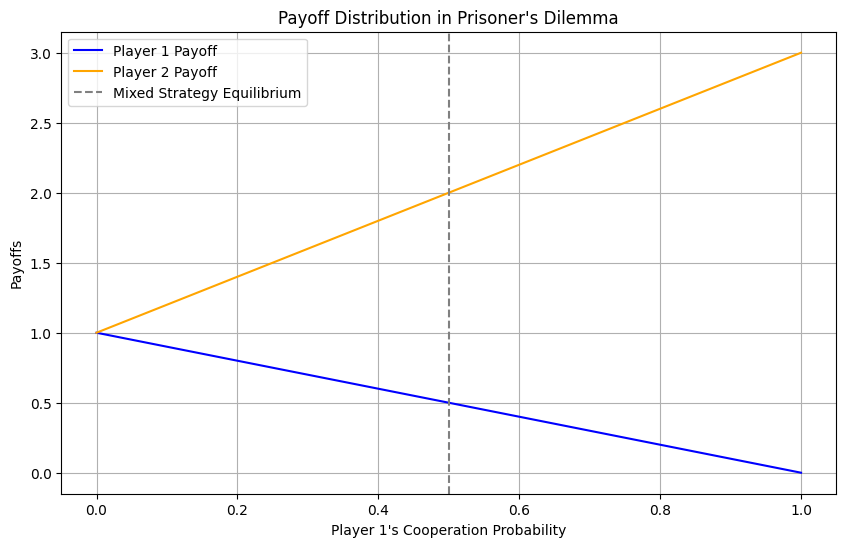

In [2]:
import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt

# Define the payoff matrices for the Prisoner's Dilemma
# Player 1's payoffs
A = np.array([[1, 0],    # Player 1's payoff when Player 2 cooperates
              [3, 2]])   # Player 1's payoff when Player 2 defects

# Player 2's payoffs
B = np.array([[1, 3],    # Player 2's payoff when Player 1 cooperates
              [0, 2]])   # Player 2's payoff when Player 1 defects

# Create a Nashpy Game
prisoners_dilemma = nash.Game(A, B)

# Calculate Nash equilibria
equilibria = prisoners_dilemma.support_enumeration()

print("Nash Equilibria:")
for eq in equilibria:
    print(eq)

# Strategy distributions for plotting
strategies = np.linspace(0, 1, 100)
payoffs_player_1 = []
payoffs_player_2 = []

for p1_strategy in strategies:
    p1_strategy_array = np.array([p1_strategy, 1 - p1_strategy])
    p2_strategy_array = np.array([1 - p1_strategy, p1_strategy])  # Assume symmetric strategies
    payoff_1 = A @ p2_strategy_array
    payoff_2 = B @ p2_strategy_array

    payoffs_player_1.append(payoff_1[0])
    payoffs_player_2.append(payoff_2[0])

# Plotting the payoffs
plt.figure(figsize=(10, 6))
plt.plot(strategies, payoffs_player_1, label="Player 1 Payoff", color='blue')
plt.plot(strategies, payoffs_player_2, label="Player 2 Payoff", color='orange')
plt.title("Payoff Distribution in Prisoner's Dilemma")
plt.xlabel("Player 1's Cooperation Probability")
plt.ylabel("Payoffs")
plt.axvline(x=0.5, color='grey', linestyle='--', label='Mixed Strategy Equilibrium')
plt.legend()
plt.grid()
plt.show()
